In [1]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.74  Python-3.8.8 torch-2.3.0+cpu CPU (Intel Core(TM) i9-10900 2.80GHz)
Setup complete  (20 CPUs, 31.7 GB RAM, 310.3/1862.9 GB disk)


In [4]:
ls

 Volume in drive E is DATA
 Volume Serial Number is B867-DA30

 Directory of E:\[1]-Cascade learning-Unsafe behavior of cranes\Final data from UBDA-GVM\Detection

07/08/2024  01:20 pm    <DIR>          .
05/08/2024  04:57 pm    <DIR>          ..
07/08/2024  01:20 pm    <DIR>          .ipynb_checkpoints
02/08/2024  03:01 pm    <DIR>          crane_detection_dataset
02/08/2024  02:58 pm               203 detr_model.yaml
07/08/2024  01:20 pm           244,920 detr-model.ipynb
02/08/2024  02:58 pm        66,509,128 rtdetr-l.pt
02/08/2024  03:02 pm    <DIR>          runs
02/08/2024  02:58 pm         6,534,387 yolov8n.pt
               4 File(s)     73,288,638 bytes
               5 Dir(s)  1,667,075,543,040 bytes free


In [5]:
model = YOLO("runs/detect/RT_DETR_0018/weights/best.pt")

In [6]:
results = model("crane_detection_dataset/images/A-MC-1-_png.rf.b0cfdd179ba30a5b5cd3b8aefddcb9da.jpg")


image 1/1 E:\[1]-Cascade learning-Unsafe behavior of cranes\Final data from UBDA-GVM\Detection\crane_detection_dataset\images\A-MC-1-_png.rf.b0cfdd179ba30a5b5cd3b8aefddcb9da.jpg: 640x640 1 mobile crane, 720.7ms
Speed: 4.4ms preprocess, 720.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['epoch', 'train/giou_loss', 'train/cls_loss', 'train/l1_loss',
                'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
                'val/giou_loss', 'val/cls_loss', 'val/l1_loss',
                'lr/pg0', 'lr/pg1', 'lr/pg2']
df = pd.read_csv('runs/detect/RT_DETR_0018/results.csv', names=column_names, skiprows=1)

In [10]:
epochs = df['epoch']
train_giou_loss = df['train/giou_loss']
train_cls_loss = df['train/cls_loss']
train_l1_loss = df['train/l1_loss']
val_giou_loss = df['val/giou_loss']
val_cls_loss = df['val/cls_loss']
val_l1_loss = df['val/l1_loss']
metrics_precision = df['metrics/precision(B)']
metrics_recall = df['metrics/recall(B)']
metrics_mAP50 = df['metrics/mAP50(B)']
metrics_mAP50_95 = df['metrics/mAP50-95(B)']

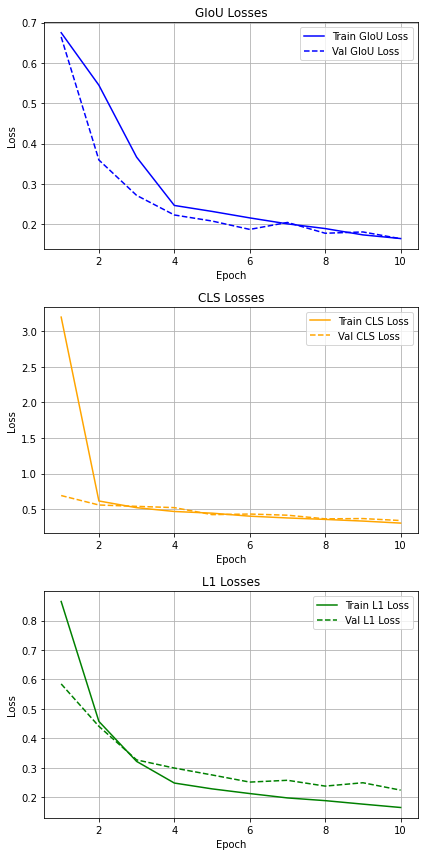

In [11]:
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)
plt.plot(epochs, train_giou_loss, label='Train GIoU Loss', color='blue')
plt.plot(epochs, val_giou_loss, label='Val GIoU Loss', linestyle='--', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GIoU Losses')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(epochs, train_cls_loss, label='Train CLS Loss', color='orange')
plt.plot(epochs, val_cls_loss, label='Val CLS Loss', linestyle='--', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CLS Losses')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(epochs, train_l1_loss, label='Train L1 Loss', color='green')
plt.plot(epochs, val_l1_loss, label='Val L1 Loss', linestyle='--', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('L1 Losses')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


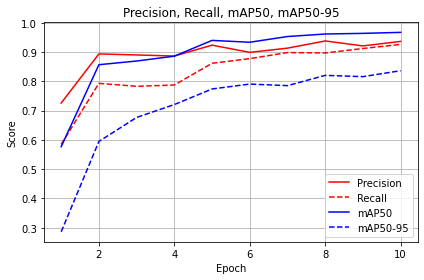

In [12]:
plt.plot(epochs, metrics_precision, label='Precision', color='red')
plt.plot(epochs, metrics_recall, label='Recall', linestyle='--', color='red')
plt.plot(epochs, metrics_mAP50, label='mAP50', color='blue')
plt.plot(epochs, metrics_mAP50_95, label='mAP50-95', linestyle='--', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision, Recall, mAP50, mAP50-95')
plt.legend()
# plt.grid(True)
save_path="P_R_Map.png"
plt.tight_layout()
plt.savefig(save_path, dpi=300)
